Import libraries

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from fuzzywuzzy import process
import random
from langdetect import detect
from googletrans import Translator
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


Datasets importing

In [4]:
food=pd.read_csv('./Dataset/food.csv')

In [5]:
df=pd.read_csv("./Dataset/diet.csv")

In [6]:

food.describe()
food.isnull().sum()
food.duplicated().sum()

0

In [7]:
df.isnull().sum()
df.duplicated().sum()

2

In [8]:
df = df.drop(columns=['Price'])
df.drop(columns=['Meal_Id'], inplace=True)
df.dropna(subset=['description'], inplace=True)
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Splitting testing

In [9]:
# Splitting features (X) and target variable (y)
X = food.drop(['Food_items'], axis=1)  # Features
y = food['Food_items']  # Target variable

# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Split the data into training and testing sets
X = df.drop(columns=['Veg_Non'])  # Features
y = df['Veg_Non']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Clustering of veg-nonveg

In [11]:
food_items = food['Food_items'].tolist()

In [12]:
print(food['VegNovVeg'].unique())


[0 1]


In [13]:
# Convert 'VegNovVeg' to numerical values (1 for Non-Veg, 0 for Veg)
food['VegNovVeg'] = food['VegNovVeg'].apply(lambda x: 1 if x == 'Non-Veg' else 0)

In [14]:
# Define keywords for non-vegetarian foods
non_veg_keywords = ['Tuna', 'Chicken', 'Salmon', 'Goat', 'Rabbit', 'Pork', 'Bacon', 'Shrimp',
                    'Meatballs', 'Beef', 'Turkey', 'Oyster']

# Function to check if a food item contains non-vegetarian keywords
def is_non_veg(food_item):
    for keyword in non_veg_keywords:
        if keyword.lower() in food_item.lower():
            return True
    return False

# Add 'VegNonVeg' column to indicate whether the food item is vegetarian or non-vegetarian
food['VegNonVeg'] = food['Food_items'].apply(lambda x: 'Non-Veg' if is_non_veg(x) else 'Veg')


In [15]:

food_list2 = df.loc[:, 'Name'].unique().tolist()
catagory_list = df['catagory'].unique().tolist()

In [16]:


label_encoder = LabelEncoder()
df['Veg_Non'] = label_encoder.fit_transform(df['Veg_Non'])

# Extract features
X = df[['Veg_Non']]

# Perform k-means clustering
k = 2  # number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Get cluster labels
cluster_labels = kmeans.labels_

# Assign cluster labels back to the DataFrame
df['Cluster'] = cluster_labels

cluster_names = {0: 'veg', 1: 'non-veg'}
df['Cluster'] = [cluster_names[label] for label in cluster_labels]

# Display the resulting DataFrame with cluster labels
#print(df[['Name', 'Veg_Non', 'Cluster']])

c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


meal type

In [17]:
# Extracting features for each meal
breakfast_data = food[['Breakfast', 'Calories', 'Fats', 'Proteins', 'Iron']]
lunch_data = food[['Lunch', 'Calories', 'Fats', 'Proteins', 'Iron']]
dinner_data = food[['Dinner', 'Calories', 'Fats', 'Proteins', 'Iron']]

# Perform k-means clustering for each meal
kmeans_breakfast = KMeans(n_clusters=2, random_state=42)
kmeans_lunch = KMeans(n_clusters=2, random_state=42)
kmeans_dinner = KMeans(n_clusters=2, random_state=42)

# Fit k-means models
kmeans_breakfast.fit(breakfast_data)
kmeans_lunch.fit(lunch_data)
kmeans_dinner.fit(dinner_data)

# Adding cluster labels to the DataFrame for each meal
food['Breakfast_Cluster'] = kmeans_breakfast.labels_
food['Lunch_Cluster'] = kmeans_lunch.labels_
food['Dinner_Cluster'] = kmeans_dinner.labels_


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: K

Disease

In [18]:
def get_mealfordisease(df, disease_name):
    food_items = df.loc[df['Disease'].str.contains(disease_name), 'Name'].tolist()

    print(f"Meal List for {disease_name}:")
    print('-' * 20)  # Separator for better readability

    if food_items:
        if len(food_items) <= 10:
            for food_item in food_items:
                print(food_item)
        else:
            random_selection = random.sample(food_items, 10)
            for food_item in random_selection:
                print(food_item)

allergy

In [19]:


def translate_description(description):
    translator = Translator()
    translated_text = translator.translate(description, src='auto', dest='en').text
    return translated_text

def get_mealforallergy(DisDif, Allergy):
    # Translate descriptions if they are not in English
    for index, row in df.iterrows():
        if detect(row['description']) != 'en':
            DisDif.at[index, 'description'] = translate_description(row['description'])

    # Filtering rows where translated 'description' does not contain the allergy
    matching_rows = df[~df['description'].str.contains(Allergy, case=False)]

    # If there are matching rows, print the list of food items
    if not matching_rows.empty:
        food_items = matching_rows['Name'].tolist()
        print(f"Food items where '{Allergy}' is not present in the Description:")
        print('-' * 20)
        if food_items:
            if len(food_items) <= 10:
                for food_item in food_items:
                    print(food_item)
            else:
                random_selection = random.sample(food_items, 10)
                for food_item in random_selection:
                    print(food_item)
    else:
        print(f"No food items found where '{Allergy}' is not present in the Description.")

user parameters

In [20]:
def calculate_bmr(age, weight_kg, height_m, gender):
    if gender.lower() == 'female':
        return 655 + (9.6 * weight_kg) + (1.8 * height_m * 100) - (4.7 * age)
    elif gender.lower() == 'male':
        return 66 + (13.7 * weight_kg) + (5 * height_m * 100) - (6.8 * age)
    else:
        raise ValueError("Invalid gender value")

def determine_protein_percentage(veg_nonveg):
    if veg_nonveg.lower() == 'veg':
        return 0.25  # Adjust protein percentage for vegetarian
    elif veg_nonveg.lower() == 'nonveg':
        return 0.35  # Adjust protein percentage for non-vegetarian
    else:
        raise ValueError("Invalid vegetarian/non-vegetarian preference")

def determine_water_intake(weight, activity_level):
    activity_levels_ml_per_kg = {
        'sedentary': 30,
        'lightly active': 35,
        'moderately active': 40,
        'very active': 45,
        'extra active': 50
    }
    return weight * activity_levels_ml_per_kg[activity_level.lower()]

def calculate_macros(weight, height, age, gender, activity_level, veg_nonveg):
    ree = calculate_bmr(age, weight, height, gender)

    activity_factors = {
        'sedentary': 1.2,
        'lightly active': 1.375,
        'moderately active': 1.55,
        'very active': 1.725,
        'extra active': 1.9
    }

    tdee = ree * activity_factors[activity_level.lower()]

    # Calculate macros based on percentages
    protein_percent = 0.3
    fat_percent = 0.25
    carb_percent = 1 - protein_percent - fat_percent

    # Adjust protein percentage based on vegetarian/non-vegetarian preference
    protein_percent = determine_protein_percentage(veg_nonveg)

    protein_calories = protein_percent * tdee
    fat_calories = fat_percent * tdee
    carb_calories = carb_percent * tdee

    protein_grams = protein_calories / 4  # 1 gram of protein = 4 calories
    fat_grams = fat_calories / 9  # 1 gram of fat = 9 calories
    carb_grams = carb_calories / 4  # 1 gram of carb = 4 calories

    # Calculate water intake recommendation based on activity level
    water_intake_ml = determine_water_intake(weight, activity_level)

    # Calculate calorie intake
    calorie_intake = tdee

    return {
        'TDEE': tdee,
        'protein': protein_grams,
        'fat': fat_grams,
        'carbs': carb_grams,
        'water': water_intake_ml
    }

def display_macros(macros):
    print("\nRecommended nutrition intake:")
    print("TDEE:", macros['TDEE'])
    print("Recommended Protein intake (g):", macros['protein'])
    print("Recommended Fat intake (g):", macros['fat'])
    print("Recommended Carbohydrate intake (g):", macros['carbs'])
    print("Recommended Water intake (ml):", macros['water'])
    # Calculating macros

# macros = calculate_macros(weight, height, age, gender, activity_level, veg_nonveg)
macros = calculate_macros(55, 1.66, 22, 'female', 'moderately active', 'veg')

# Print the calculated values
display_macros(macros)


Recommended nutrition intake:
TDEE: 2136.52
Recommended Protein intake (g): 133.5325
Recommended Fat intake (g): 59.34777777777778
Recommended Carbohydrate intake (g): 240.35849999999996
Recommended Water intake (ml): 2200


Generating Sets

In [21]:

def calculate_sums(random_sets):
    sums = {'Calories': 0, 'Proteins': 0, 'Fats': 0, 'Carbohydrates': 0}
    for set_values in random_sets:
        for i, nutrient in enumerate(['Calories', 'Proteins', 'Fats', 'Carbohydrates']):
            sums[nutrient] += set_values[i]
    return sums

def generate_nutrient_sets(calories_total, proteins_total, fats_total, carbohydrates_total, num_sets=10):
    """Generates a specified number of unique sets of nutrient recommendations."""
    calories_target = calories_total // num_sets
    proteins_target = proteins_total // num_sets
    fats_target = fats_total // num_sets
    carbohydrates_target = carbohydrates_total // num_sets
    sets = []
    counter = 0
    
    while len(sets) < num_sets:
        calories = random.randint(calories_target - 250, calories_target + 250)
        proteins = random.randint(proteins_target - 15, proteins_target + 15)
        fats = random.randint(fats_target - 10, fats_target + 10)
        carbohydrates = random.randint(carbohydrates_target - 25, carbohydrates_target + 25)
        
        if not any(all(value == nutrient for value in nutrient_set) for nutrient_set in sets for nutrient in (calories, proteins, fats, carbohydrates)):
            sets.append((calories, proteins, fats, carbohydrates))
            counter += 1
    
    return sets

def generate_sets_from_nutrient_recommendations(nutrient_recommendations):
    sets = []
    
    for recommendation in nutrient_recommendations:
        calories, proteins, fats, carbohydrates = recommendation
        sets.append({
            'calories': calories,
            'proteins': proteins,
            'fats': fats,
            'carbohydrates': carbohydrates
        })
    
    return sets



Prediction of food from dataset 1

In [22]:
veg_nonveg = input("Enter Food Preferences: ")
allergies_input = input("Enter if any allergy you have:")
allergies = [allergy.strip().lower() for allergy in allergies_input.split(',') if allergy.strip()]

In [23]:
def food_food_subset(veg_nonveg, food):
    if veg_nonveg.lower() == 'veg':
        return food[food['VegNonVeg'] == 'Veg']
    elif veg_nonveg.lower() == 'non-veg':
        return food  # Assuming 'Non-Veg' indicates non-vegetarian
    else:
        raise ValueError("Invalid input.")

In [24]:
def predict_food_names(sets, knn, food):
    # Initialize set to store predicted food names
    predicted_food_names = set()
    # Loop through each generated set
    for set_values in sets:
        # Reshape the set_values to match the input format of the model
        X_input = np.array(set_values).reshape(1, -1)

        # Predict the index using the trained model
        predicted_index = knn.predict(X_input)

        # Get the predicted food name
        predicted_food_name = food.loc[predicted_index[0], 'Food_items']

        # Check if the predicted food name has not been written already
        if predicted_food_name not in predicted_food_names:
            # Add the food name to the set of predicted food names
            predicted_food_names.add(predicted_food_name)
    
    return predicted_food_names


In [25]:
def predicted_food_names_with_allergies(allergies, predicted_food_names):
    predicted_food = []  # Initialize predicted_food list
    if allergies is not None:
        for food_name in predicted_food_names:
            food_name_split = [word.strip().lower() for word in food_name.split(' ')]
            if not any(allergy in food_name_split for allergy in allergies):
                predicted_food.append(food_name)
    return predicted_food

In [27]:
food_subset = food_food_subset(veg_nonveg, food)
generated_sets = generate_nutrient_sets(macros['TDEE'], macros['protein'], macros['fat'], macros['carbs'])

if veg_nonveg.lower() == 'veg':
    food_veg = joblib.load('food_veg_knn.h5')
    predicted_food_names = predict_food_names(generated_sets, food_veg, food_subset)
elif veg_nonveg.lower() == 'non-veg':
    food = joblib.load('food_knn.h5')
    predicted_food_names = predict_food_names(generated_sets, food, food_subset)

if allergies is not None:
    predicted_food = predicted_food_names_with_allergies(allergies, predicted_food_names)
else:
    predicted_food = predicted_food_names
    
for food_name in predicted_food:
    print(food_name)

Tea
Chocolate Doughnuts
Bhaji Pav
Sweet Potatoes cooked
American cheese
Egg Yolk cooked
Steak Fries
Green Tea
Pasta canned with tomato sauce


c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator KNeighborsClassifier from version 1.3.1 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\Users\Gyatri C Gide\anaconda3\envs\goku\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with

Dishes from 2nd Dataset

In [28]:
def translate_description(description):
    if detect(description) != 'en':
        translator = Translator()
        translated = translator.translate(description, src='auto', dest='en')
        return translated.text
    else:
        return description

In [29]:
def df_food_subset(veg_nonveg, df):
    if veg_nonveg.lower() == 'veg':
        return df[df['Cluster'] == 'veg']  # Filter only the rows where the 'Cluster' column is 'veg'
    elif veg_nonveg.lower() == 'non-veg':
        return df  # Return the original DataFrame for non-vegetarian items
    else:
        raise ValueError("Invalid input.")

In [30]:
def search_food_names_without_allergy(df_filtered, search_words):
    # Initialize sets to keep track of printed food names and search words
    printed_food_names = set()
    printed_search_words = set()
    
    for _, row in df_filtered.iterrows():
        # Translate the description of the food item
        translated_description = translate_description(row['description'])
        
        # Split the translated description into words
        translated_words = translated_description.split()
        
        # Check if any of the translated words match the search words
        for word in search_words:
            if word.lower() in translated_words:
                # Check if the food name has not been printed already
                if row['Name'] not in printed_food_names:
                    #print(row['Name'])
                    printed_food_names.add(row['Name'])
                break
        else:
            # Check if the search word has not been printed already
            if word not in printed_search_words:
                #print(word)
                printed_search_words.add(word)

    return printed_food_names, printed_search_words   

Description

In [31]:
# Function to get the description of the food item
def get_description(food_item):
    # Check if the food item exists in the DataFrame using fuzzy matching
    matched_food = process.extractOne(food_item, df['Name'])

    # Check if any food item was matched
    if matched_food:
        matched_food_name = matched_food[0]
        score = matched_food[1]

        # Check if the matched food item has a high similarity score
        if score >= 80:  # You can adjust the threshold as needed
            # Get the description of the matched food item
            description = df.loc[df['Name'] == matched_food_name, 'description'].values[0]

            # Check if the description is in English
            if detect(description) != 'en':
                # Translate the description to English
                translated_description = translate_description(description)
                return translated_description
            else:
                return description
        else:
            print('Description in not present in the dataset.')
    else:
        print('Description in not present in the dataset.')


In [32]:
for user_input in predicted_food:
    description = get_description(user_input)
    print(f"Description of {user_input}:", description)

Description of Tea: buns, all purpose white flour, dry yeast, sugar, salt, warm water, chicken mince, eggs, soy sauce, sugar, sesame oil, worcestershire sauce, chives, aromat powder
Description of Chocolate Doughnuts: Sugar, egg yellow, egg, butter, yeast, milk
Description in not present in the dataset.
Description of Bhaji Pav: None
Description of Sweet Potatoes cooked: Chicken Breast, Kasundi (Bengali Mustard Sauce), Sweet Potato, Red and Yellow Capsicum, Brockley, Garlic Burdery, Refined Oil, salt, butter, cream, green onion, honey, ginger and garlic paste
Description of American cheese: black pepper, black salt, bread crumb, corn flour, refined oil, jalapeno, jeera powder, maida, cottage cheese, parsley, salt, for thousand island dressing:, mayonnaise, tomato ketchup, minced garlic, celery, black pepper
Description of Egg Yolk cooked: red wine (merlot / zinfandel), apple cider, honey, orange (zested and juiced), cloves (whole), green cardamom, cinnamon sticks, anise (whole), brandy

Meal Without Allergy

In [33]:
def search_food_names_with_allergy(df_filtered, search_words, allergies):
    # Initialize sets to keep track of printed food names and search words
    printed_food_names = set()
    printed_search_words = set()
    
    # Iterate over each row in the DataFrame
    for _, row in df_filtered.iterrows():
        # Translate the description of the food item
        translated_description = translate_description(row['description'])
        
        # Check for allergies in the translated description
        allergy_found = False
        for allergy in allergies:
            if allergy.lower() in translated_description.lower():
                allergy_found = True
                break
        
        if allergy_found:
            continue  # Skip this food item if allergy is found
        
        # Split the translated description into words
        translated_words = translated_description.split()
        
        # Check if any of the translated words match the search words
        for word in search_words:
            if word.lower() in translated_words:
                # Check if the food name has not been printed already
                if row['Name'] not in printed_food_names:
                    #print(row['Name'])
                    printed_food_names.add(row['Name'])
                break
        else:
            # Check if the search word has not been printed already
            if word not in printed_search_words:
                #print(word)
                printed_search_words.add(word)
    
    return printed_food_names, printed_search_words              


In [36]:

# Assuming allergies, predicted_food_names, and df are defined elsewhere

df_filtered = df_food_subset(veg_nonveg, df)
search_words = ' '.join(predicted_food_names).lower().split()

if allergies is not None:
    printed_food_names, printed_search_words = search_food_names_with_allergy(df_filtered, search_words, allergies)
else:
    # Assuming you have defined search_food_names_without_allergy function elsewhere
    printed_food_names, printed_search_words = search_food_names_without_allergy(df_filtered, search_words)

# Convert the union of sets into a list
population = list(printed_food_names.union(printed_search_words))

# Ensure the length of the population is not more than 10
population_size = min(10, len(population))

# Perform random sampling
random_selection = random.sample(population, population_size)

# Print the random selection
for food_name in random_selection:
    print(food_name)


strawberry &amp; pistachio breton tart
filo pizza
holi special bhang pakode
prawn fried rice
chocolate marquise
mexican pizza
holi special ice tea thandai
baked shankarpali recipe
cooked
tricolour pizza


Graph of ingredient or food listed above

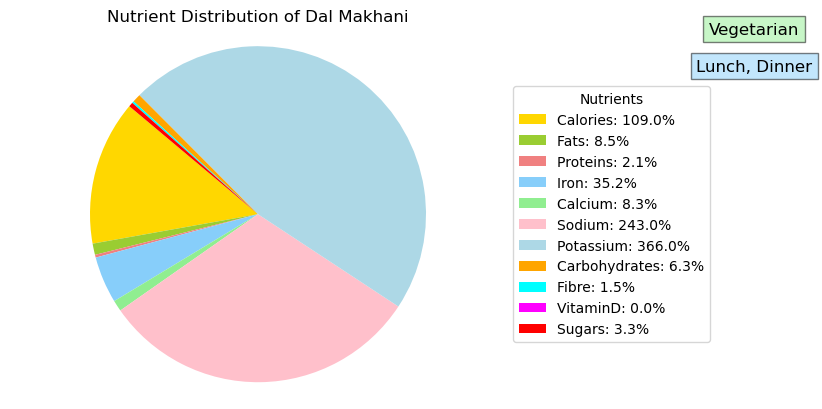

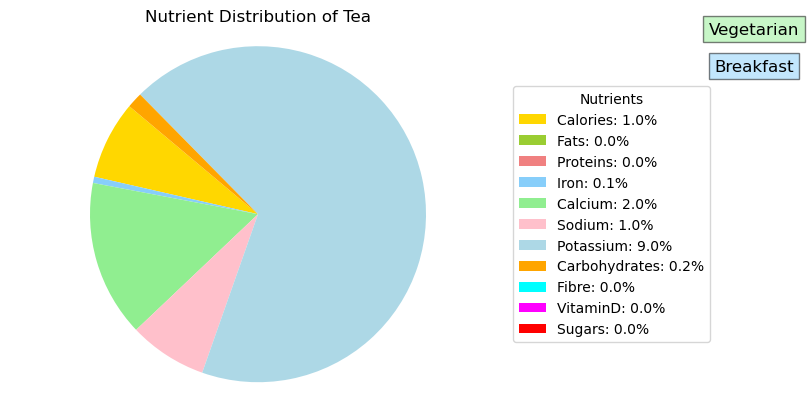

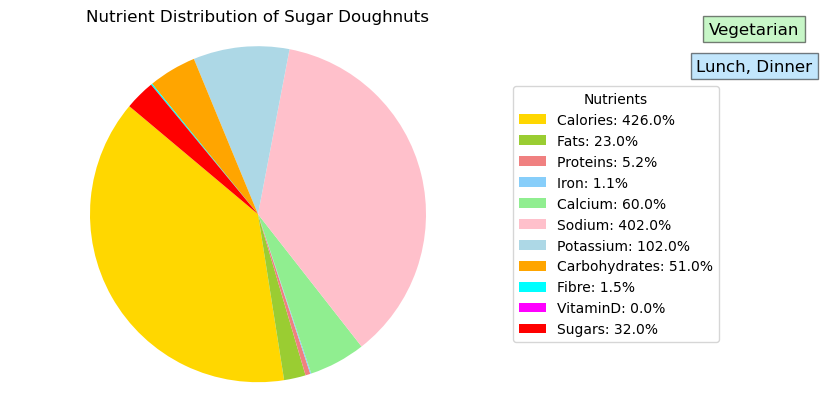

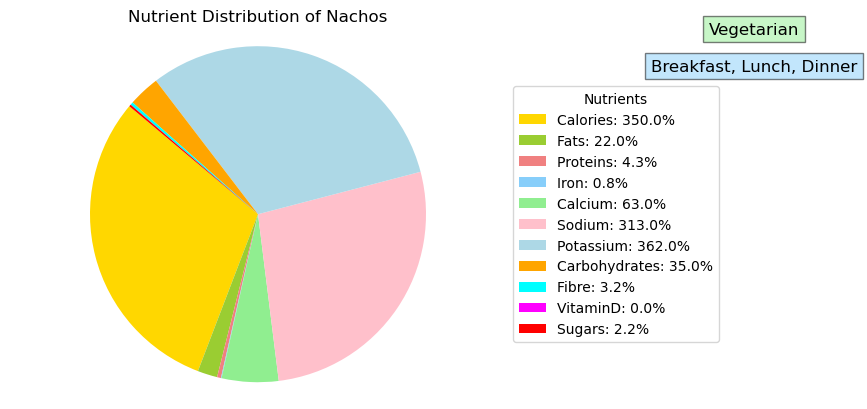

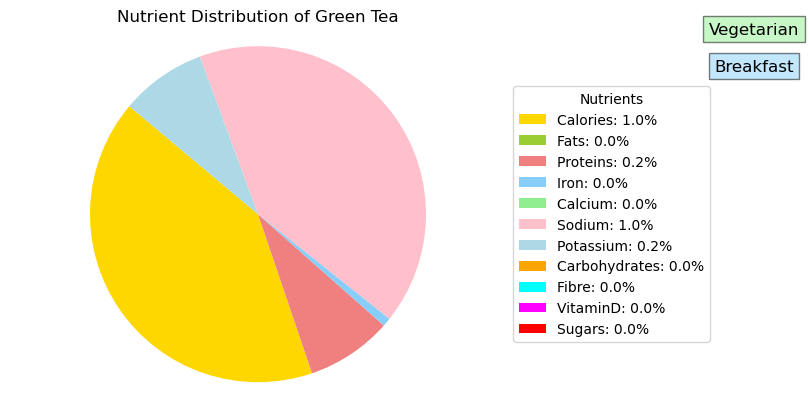

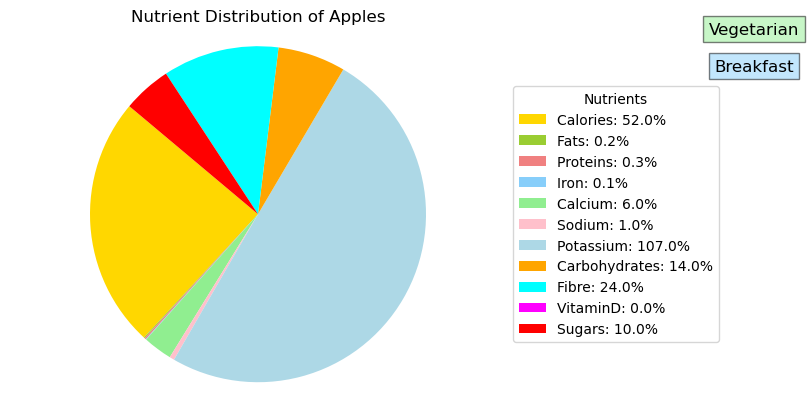

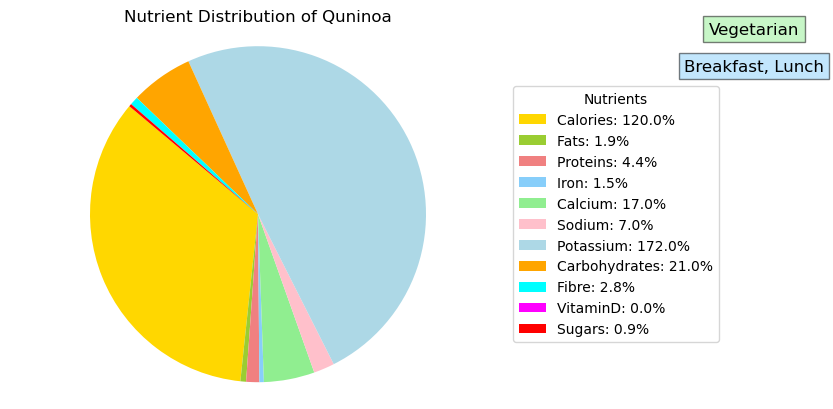

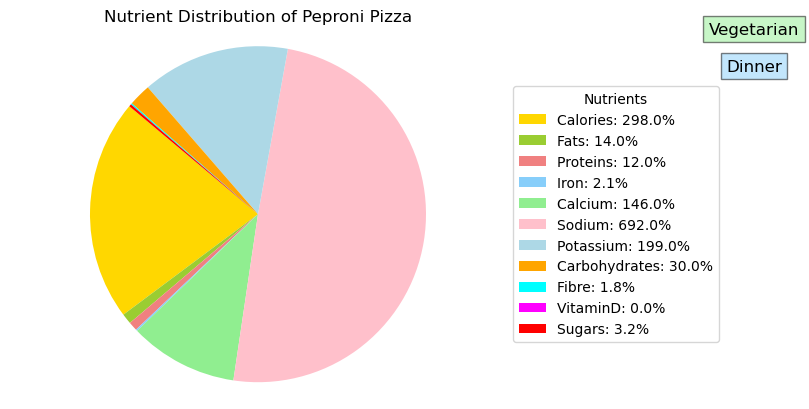

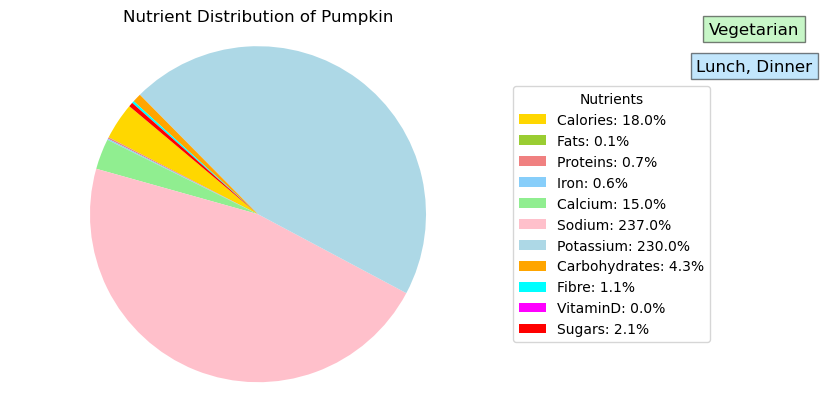

In [ ]:


def create_pie_chart(food, predicted_food_names):
    for food_name in predicted_food_names:
    # Perform fuzzy string matching to find the closest match
        match = process.extractOne(food_name, food['Food_items'])
        if match[1] >= 80:  # Adjust the threshold as needed
            food_item = match[0]  # Use the closest match
            item_row = food[food['Food_items'] == food_item]
            
            # Nutrient labels and sizes
            labels = ['Calories', 'Fats', 'Proteins', 'Iron', 'Calcium', 'Sodium',
                    'Potassium', 'Carbohydrates', 'Fibre', 'VitaminD', 'Sugars']
            sizes = item_row[labels].values[0]
            
            # Colors for the pie chart
            colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen',
                    'pink', 'lightblue', 'orange', 'cyan', 'magenta', 'red']
            
            # Create pie chart
            fig, ax = plt.subplots()
            wedges, _, _ = ax.pie(sizes, colors=colors, autopct='', startangle=140, textprops=dict(color="black"))
            
            # Add legend next to the pie chart
            ax.legend(wedges, [f'{label}: {size:.1f}%' for label, size in zip(labels, sizes)], title="Nutrients", loc="center left", bbox_to_anchor=(1, 0.5))
            
            # Include information about whether the food item is vegetarian or non-vegetarian
            veg_nonveg = item_row['VegNovVeg'].values[0]
            if veg_nonveg == 0:
                veg_label = 'Vegetarian'
            else:
                veg_label = 'Non-Vegetarian'
            plt.text(1.5, 1.0, f'{veg_label}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='lightgreen', alpha=0.5))
            
            # Include information about meal type (breakfast, lunch, or dinner)
            meal_type = ''
            if item_row['Breakfast'].values[0] == 1:
                meal_type += 'Breakfast'
            if item_row['Lunch'].values[0] == 1:
                if meal_type:
                    meal_type += ', '
                meal_type += 'Lunch'
            if item_row['Dinner'].values[0] == 1:
                if meal_type:
                    meal_type += ', '
                meal_type += 'Dinner'
            plt.text(1.5, 0.9, f'{meal_type}', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=12, bbox=dict(facecolor='lightskyblue', alpha=0.5))
            
            # Equal aspect ratio ensures that pie is drawn as a circle
            ax.axis('equal')  
            
            # Title for the pie chart
            plt.title(f'Nutrient Distribution of {food_item}')
            
            # Show the pie chart
            plt.show()
        else:
            print("Food item not found or not similar enough in the dataset.")   

create_pie_chart(food, predicted_food)